# Module 4

Importing libraries

In [1]:
import pandas as pd #Data Wrangling library
import numpy as np #Numerical Python library
import matplotlib.pyplot as plt #Data-Visualization library

## 4.1 

In [2]:
#Loading dataset
df = pd.read_csv('Saved Datasets/INFY_BOLINGER.csv')

#First Five rows
df.head()

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,Price * Volume,Day_Perc_Change,Trend,14 Day average,Lower S.D.,Higher S.D.
0,2017-06-01,INFY,EQ,977.05,969.3,979.70,958.55,971.25,971.40,969.49,...,1822506,66.17,6,2017,2.675530e+09,-0.578271,Slight negative,968.671429,936.708789,1000.634068
1,2017-06-02,INFY,EQ,971.40,973.4,975.45,964.20,966.00,969.45,968.76,...,1396644,71.29,6,2017,1.899136e+09,-0.200741,Slight or No change,969.950000,939.543472,1000.356528
2,2017-06-05,INFY,EQ,969.45,970.0,972.00,957.05,959.00,958.75,961.71,...,1941199,71.07,6,2017,2.618681e+09,-1.103719,Negative,970.217857,940.316774,1000.118940
3,2017-06-06,INFY,EQ,958.75,965.0,987.50,964.40,980.00,979.35,980.08,...,2018029,57.59,6,2017,3.431978e+09,2.148631,Positive,972.114286,943.638076,1000.590495
4,2017-06-07,INFY,EQ,979.35,985.0,988.90,945.00,959.30,961.30,963.75,...,2519343,40.45,6,2017,5.986518e+09,-1.843059,Negative,972.082143,943.554569,1000.609717


In [3]:
#Dimensions of our data
df.shape

(481, 23)

There are 481 observations and 23 features

In [4]:
#Converting Date to datetime64
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
#Setting up Date as Index
df.reset_index(inplace = True)

In [6]:
#Creating new column Call
df['Call'] = '0'
for i in range(0, df.shape[0]):
    if df.loc[i, 'Close Price'] < df.loc[i, 'Lower S.D.']:
        df.loc[i, 'Call'] = 'Buy'
    elif df.loc[i, 'Close Price'] > df.loc[i, 'Lower S.D.'] and df.loc[i, 'Close Price'] < df.loc[i, '14 Day average']:
        df.loc[i, 'Call'] = 'Hold Buy/Liquidate Short'
    elif df.loc[i, 'Close Price'] < df.loc[i, 'Higher S.D.'] and df.loc[i, 'Close Price'] > df.loc[i, '14 Day average']:
        df.loc[i, 'Call'] = 'Hold Short/Liquidate Buy'
    elif df.loc[i, 'Close Price'] > df.loc[i, 'Higher S.D.']:
        df.loc[i, 'Call'] = 'Short'

In [7]:
#Data Preprocessing
X = df[['Close Price', '14 Day average', 'Lower S.D.', 'Higher S.D.']].values
Y = df['Call'].values

In [8]:
#Splitting up data into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [9]:
#Normalizing up the x_train and x_test

from sklearn.preprocessing import StandardScaler

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [10]:
#Importing library to find accuracy
from sklearn.metrics import accuracy_score

#### Classification Model Using K- Nearest Neighbors

In [11]:
#Importing libraries
from sklearn.neighbors import KNeighborsClassifier

In [12]:
#Finding out the best value of K for which accuracy of model is maximum

Ks = 10
mean_acc = np.zeros((Ks - 1))

for n in range(1, Ks):
    neigh = KNeighborsClassifier(n_neighbors = n)
    neigh.fit(x_train, y_train)
    yhat = neigh.predict(x_test)
    mean_acc[n - 1] = accuracy_score(y_test, yhat)
    
print(mean_acc)

[0.84536082 0.80412371 0.84536082 0.78350515 0.80412371 0.80412371
 0.79381443 0.80412371 0.80412371]


In [13]:
#The value of K for which the accuracy of model is maximum
print("The value of K is ", mean_acc.argmax() + 1, 'and accuracy is', mean_acc.max())

The value of K is  1 and accuracy is 0.845360824742268


In [15]:
#Training our model with K =1
neigh = KNeighborsClassifier(n_neighbors = 1).fit(x_train, y_train)

#### Classification model using Decision Tree

In [16]:
#Importing library
from sklearn.tree import DecisionTreeClassifier

In [17]:
#Training model using DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
#Accuracy of model on test data
yhat = decision_tree.predict(x_test)
print("Accuracy of Decision Tree is: ", accuracy_score(y_test, yhat))

Accuracy of Decision Tree is:  0.6391752577319587


#### Classification using Support Vector Machine

In [19]:
#Importing library
from sklearn.svm import SVC

In [20]:
#Training model using SVC
svc = SVC(kernel = 'linear')
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [21]:
#Accuracy of model on test data
yhat = svc.predict(x_test)
print("Accuracy using Support Vector Machine: ", accuracy_score(y_test,  yhat))

Accuracy using Support Vector Machine:  0.9072164948453608


#### The model using Support Vector Machine have the highest accuracy of 0.90. 

Predicting Trade Calls for TCS Stock

In [23]:
#Importing stock
df_tcs = pd.read_csv('Datasets/Large_Cap/TCS.csv')

#First five rows of our dataset
df_tcs.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TCS,EQ,15-May-2017,2360.65,2375.1,2377.95,2341.60,2368.00,2365.10,2352.60,908802,2.138043e+09,30047,712450,78.39
1,TCS,EQ,16-May-2017,2365.10,2380.0,2435.00,2373.45,2425.10,2429.15,2410.26,1800513,4.339703e+09,58476,1167534,64.84
2,TCS,EQ,17-May-2017,2429.15,2433.5,2460.75,2423.00,2450.00,2455.35,2443.31,1438099,3.513729e+09,86412,1031752,71.74
3,TCS,EQ,18-May-2017,2455.35,2450.0,2572.00,2442.25,2525.00,2536.20,2525.78,2569297,6.489478e+09,111566,1135613,44.20
4,TCS,EQ,19-May-2017,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,2506.58,893022,2.238430e+09,63112,517461,57.94


In [25]:
#Data Preprocessing

#Converting datatype of Date column
df_tcs['Date'] = pd.to_datetime(df_tcs['Date'])

#Setting up date as index
df_tcs.set_index('Date', inplace = True)

#Calculating Bollinger Columns
df_tcs['14 Day average'] = df_tcs['Average Price'].rolling(14).mean()
df_tcs['S.D.'] = df_tcs['Average Price'].rolling(14).std()
df_tcs['Lower S.D.'] = df_tcs['14 Day average'] - 2 * df_tcs['S.D.']
df_tcs['Higher S.D.'] = df_tcs['14 Day average'] + 2 * df_tcs['S.D.']

#Removing rows with missing values
df_tcs.dropna(inplace = True)

#Storing predictor variable
X = df_tcs[['Close Price', '14 Day average', 'Lower S.D.', 'Higher S.D.']].values

#Normalizing up the variables
X = StandardScaler().fit_transform(X)

In [26]:
#Predicting up Trade Call
df_tcs['Call'] = svc.predict(X)

## 4.2

In [28]:
#Importing dataset
df = pd.read_csv('Datasets/INFY.csv')

In [29]:
#Defining new columns

#% Change between Open and Close Price for day
df['OC_Perc_Change'] = (df['Close Price'] - df['Open Price']) / df['Open Price']
df['OC_Perc_Change'] = df['OC_Perc_Change'] * 100

#% Change between Low and High Price for day
df['LH_Perc_Change'] = (df['High Price'] - df['Low Price']) / df['Low Price']
df['LH_Perc_Change'] = df['LH_Perc_Change'] * 100

#Calculating percentage change in close price column
df['Day_Perc_Change'] = df['Close Price'].pct_change() * 100

#Replacing missing value of Day_Perc_Change column with 0
df['Day_Perc_Change'].replace(np.nan, 0, inplace = True)


#5 day rolling mean of the day to day % change in Close Price
df['5 Day Average'] = df['Day_Perc_Change'].rolling(5).mean()

#5 day rolling standard deviation of the day to day % change in Close Price
df['5 Day SD'] = df['Day_Perc_Change'].rolling(5).std()


In [30]:
#Creating new column Action

df['Action'] = np.nan

for i in range(0, df.shape[0] - 1):
    if df.loc[i, 'Close Price'] > df.loc[i+1, 'Close Price']:
        df['Action'] = -1
    elif df.loc[i, 'Close Price'] < df.loc[i+1, 'Close Price']:
        df['Action'] = 1

In [31]:
#Removinng rows with null values
df.dropna(inplace = True)

In [32]:
#Resetting the index
df.index = range(0, df.shape[0])

In [33]:
#Importing library
from sklearn.ensemble import RandomForestClassifier

In [34]:
#Storing features and target variable
X = df[['OC_Perc_Change', 'LH_Perc_Change', '5 Day Average', '5 Day SD']].values
Y = df['Action'].values

In [35]:
#Splitting up the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [36]:
#Building up the model

random_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', max_depth = 3)
random_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
#Accuracy of the model on test data
yhat = random_forest.predict(x_test)

print("Accuracy of Random Forest Model is: ", accuracy_score(y_test, yhat))

Accuracy of Random Forest Model is:  1.0


In [38]:
#Changing datatype of Date Column
df['Date'] = pd.to_datetime(df['Date'])

#Setting up Date as index
df.set_index('Date', inplace = True)

Text(0, 0.5, 'Strategy returns')

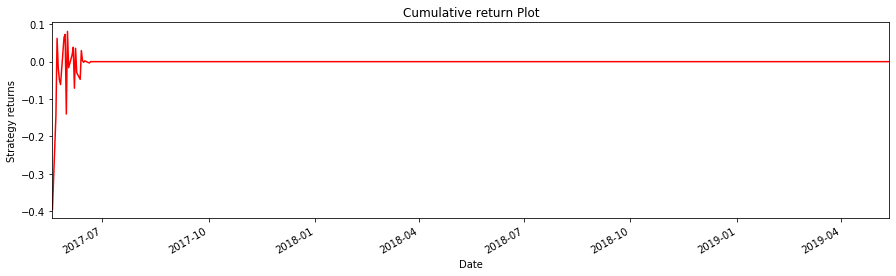

In [39]:
#Cumulative returns plot
daily_cr = (df['Day_Perc_Change']).cumprod()
daily_cr.plot(kind = 'line', color = 'red', figsize = (15, 4))
plt.title('Cumulative return Plot')
plt.ylabel('Strategy returns')